In [1]:
import sys
import numpy as np
from pylab import *
from scipy import *
import matplotlib as mpl
import matplotlib.pyplot as plt
# Specific imports
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pandas as pd
import csv

Bifurcation diagram

In [2]:
bT = pd.read_table("b.mu", skiprows=16, delim_whitespace=True, header=None)
bT = bT.apply(pd.to_numeric, errors='coerce')
bT

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,9.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
2,1,2.0,0.0,0.0,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
3,1,3.0,0.0,0.0,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
4,1,4.0,0.0,0.0,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5255,8,16.0,0.0,0.0,416.990786,1.180242,0.000264,0.005396,0.110198,1.613503,NaN,NaN,NaN,NaN
5256,8,17.0,5.0,301.0,416.990786,1.280163,0.000287,0.005853,0.119527,1.750104,NaN,NaN,NaN,NaN
5257,8,18.0,0.0,0.0,416.990786,1.380163,0.000309,0.006311,0.128864,1.886814,NaN,NaN,NaN,NaN
5258,8,19.0,5.0,302.0,416.990786,1.474342,0.000330,0.006741,0.137658,2.015549,NaN,NaN,NaN,NaN


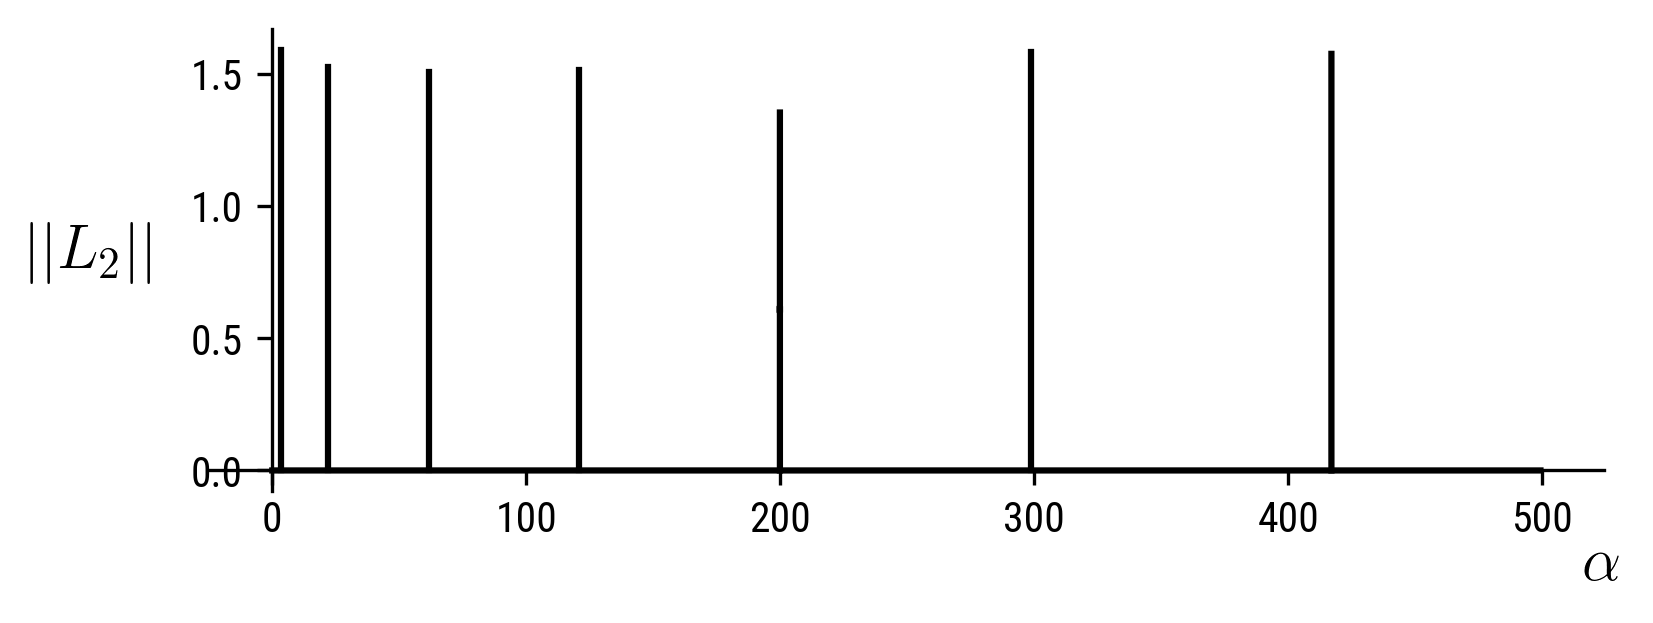

In [24]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc("font", family="Roboto Condensed")
plt.rc("xtick", labelsize="medium")

fig = plt.figure(figsize=(6, 2), dpi=300)
ax = plt.gca()
#plt.rcParams.update({"text.usetex": True})
n = 9
for bInd in np.arange(1,n):
    linewidth = 1.5 if bInd == 1 else 1.5
    linestyle = "-" if bInd == 1 else "-"
    color = "C1" if bInd == 0 else "%.2f" % (0.0)

    ax.plot(bT.loc[bT[0] == bInd][4].tolist(),
            bT.loc[bT[0] == bInd][5].tolist(),
            color=color,
            clip_on=False,
            zorder=n - bInd,
            linewidth=linewidth,
            linestyle=linestyle,
            )
ax.set_xlabel(r'$\alpha$',usetex=True, fontsize=15)
ax.set_ylabel(r'$||L_2||$',usetex=True,rotation=0, fontsize=15)
#ax.set_yscale('log')
#ax.set_xticks(np.linspace(0.1,0.5,5))
#ax.set_yticks(np.linspace(0.1,0.3,3))
#ax.set_yticklabels([r'$-\pi$', '$\pi$'],usetex=True)

ax.xaxis.set_label_coords(1.0,-0.1)
#ax.xaxis.set_ticks_position('top')
#ax.tick_params(labelbottom=False,labeltop=True)
ax.yaxis.set_label_coords(-0.08,0.45)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_position(("data", -0.0))
ax.spines["bottom"].set_position(("data", 0.0))

plt.show()

Plotting solution from s.XXX file

In [65]:
fl = pd.read_table("s.mu", nrows=0, sep="\t", delim_whitespace=True)
lst = list(fl)
con = [float(x) for x in lst]
con = [int(x) for x in con]
ibr = int(con[0]) #the index of the branch
ntot = con[1] #the index of the point
itp = con[2] #the type of point
lab = con[3] #the label of the point
nfpr = con[4] #the number of free parameters used in the computation
isw = con[5] #the value of isw used in the computation
ntpl = con[6] #the number of points in the time interval [0,1]
nar = con[7] #the number of values written per point
nrowpr = con[8] #the number of lines printed following the identifying line
ntst = con[9] #the number of time intervals used in the discretization
ncol = con[10] #the number of collocation points used
nparx = con[11] #the dimension of the array par

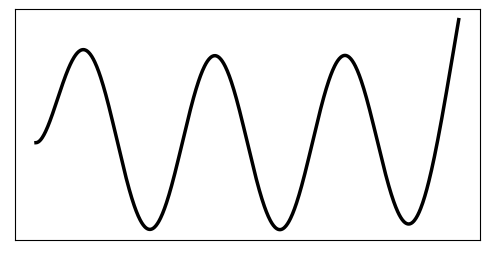

In [82]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc("font", family="Roboto Condensed")
plt.rc("xtick", labelsize="medium")

n = 300
fig = plt.figure(figsize=(6,3), dpi=100)
#fig = plt.figure(dpi=100)
ax = plt.gca(xticks=[], yticks=[]) #you first need to get the axis handle
#ax.set_aspect(0.9)
#ax.set_xlim([-1.0,1.0])
#ax.set_ylim([-1.0,1.0])
#for ind in np.arange(1,n,5):
ind = n
linewidth = 2.5
linestyle = "-" if ind == 1 else "-"
color = "C1" if ind == 0 else "%.2f" % ((n-ind)/n)
df = pd.read_csv("s.mu", header=None, skiprows=ind*nrowpr+ind+1, nrows=ntpl, delim_whitespace=True)
ax.plot(df[0].tolist(), df[1].tolist(), color="white", clip_on=False, zorder=ind, linewidth=3.5)
ax.plot(df[0].tolist(),
        df[1].tolist(),
        color=color,
        clip_on=False,
        zorder=ind,
        linewidth=linewidth,
        linestyle=linestyle,)
plt.show()